Image '/work/courses/dslab/team14/training/vacuum_pump/images/original/stage_0/stage_0_case_render_9.jpg' loaded successfully. Shape: (512, 512, 3)


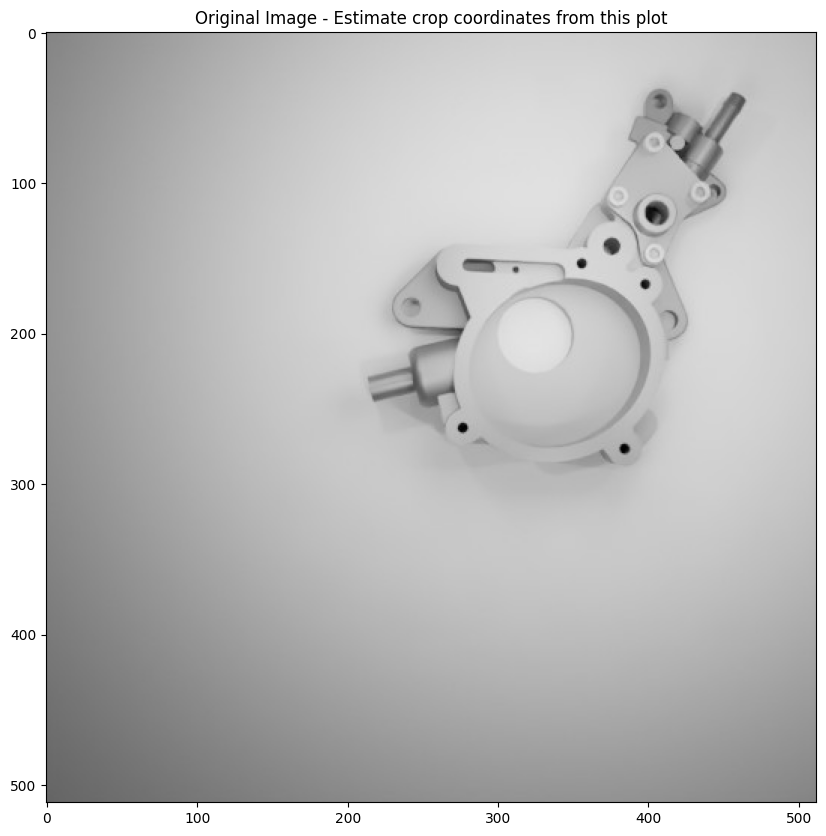


Using manual crop coordinates: x=200, y=0, w=300, h=300
Successfully saved manually cropped image to '/work/courses/dslab/team14/training/vacuum_pump/images/cropped/obj9.jpg'


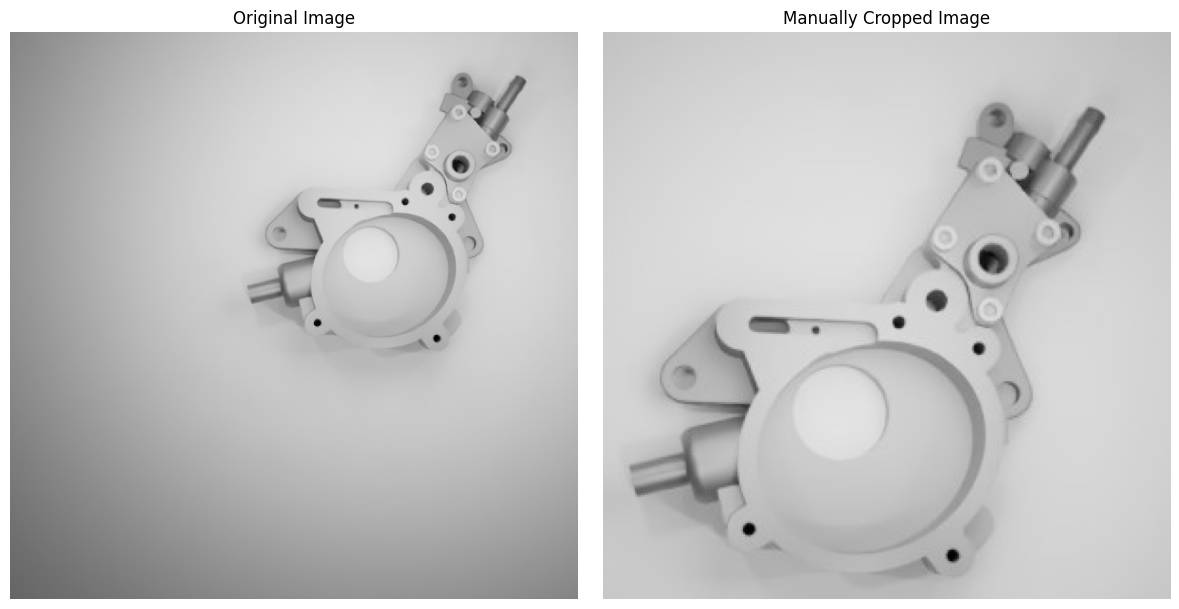

In [38]:
import cv2
import matplotlib.pyplot as plt

# Define input and output image paths
n = 9
input_image_path = f"/work/courses/dslab/team14/training/vacuum_pump/images/original/stage_0/stage_0_case_render_{n}.jpg"
output_image_path = f"/work/courses/dslab/team14/training/vacuum_pump/images/cropped/obj{n}.jpg"

# Load the image
img_original_bgr = cv2.imread(input_image_path)

if img_original_bgr is None:
    print(f"Error: Could not read image from {input_image_path}")
else:
    print(f"Image '{input_image_path}' loaded successfully. Shape: {img_original_bgr.shape}")
    
    # Convert BGR (OpenCV) to RGB (Matplotlib) for display
    img_original_rgb = cv2.cvtColor(img_original_bgr, cv2.COLOR_BGR2RGB)

    # Display the original image so you can estimate coordinates
    plt.figure(figsize=(10, 10)) # Adjust figure size as needed
    plt.imshow(img_original_rgb)
    plt.title("Original Image - Estimate crop coordinates from this plot")
    # plt.axis('on') # Turn on axis to help with coordinate estimation
    plt.show()

    # --- MANUALLY DEFINE CROP COORDINATES ---
    # You need to determine these values by looking at the image above.
    # (x, y) is the top-left corner of the crop rectangle
    # w is the width of the crop rectangle
    # h is the height of the crop rectangle
    
    # Example coordinates (replace these with your desired values!)
    x = 200
    y = 0
    w = 300 # example: width - 500px from each side
    h = 300                           # example: height up to 2800px

    print(f"\nUsing manual crop coordinates: x={x}, y={y}, w={w}, h={h}")

    # Validate coordinates (basic check)
    if x < 0 or y < 0 or w <= 0 or h <= 0 or (x + w) > img_original_bgr.shape[1] or (y + h) > img_original_bgr.shape[0]:
        print("Error: Invalid crop coordinates. Please check x, y, w, h.")
        print(f"Image dimensions are: width={img_original_bgr.shape[1]}, height={img_original_bgr.shape[0]}")
    else:
        # Crop image using array slicing
        img_cropped_bgr = img_original_bgr[y:y+h, x:x+w]

        if img_cropped_bgr.size == 0:
            print("Error: Cropped image is empty with the given coordinates.")
        else:
            # Save the cropped image
            cv2.imwrite(output_image_path, img_cropped_bgr)
            print(f"Successfully saved manually cropped image to '{output_image_path}'")

            # Convert cropped image to RGB for displaying
            img_cropped_rgb = cv2.cvtColor(img_cropped_bgr, cv2.COLOR_BGR2RGB)

            # Display original and cropped images side by side
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            axes[0].imshow(img_original_rgb)
            axes[0].set_title(f"Original Image")
            axes[0].axis('off')

            axes[1].imshow(img_cropped_rgb)
            axes[1].set_title(f"Manually Cropped Image")
            axes[1].axis('off')

            plt.tight_layout()
            plt.show()